In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
print(X_train.shape)
print(X_train[0].shape)

(60000, 28, 28)
(28, 28)


In [4]:
X_train=X_train/255
X_test=X_test/255
len(X_train)

60000

In [5]:
# len(X_test)
# X_test.shape
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

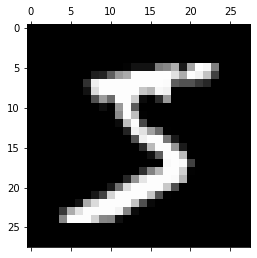

In [6]:
plt.matshow(X_train[0])
plt.gray()

In [7]:
y_train[0]

5

In [8]:
X_train_flattened=X_train.reshape(len(X_train),28*28)  #len(X_train)=60000
X_test_flattened=X_test.reshape(len(X_test),28*28)    #len(X_test)=10000

In [9]:
X_train_flattened.shape

(60000, 784)

In [10]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4648 - accuracy: 0.8793
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3035 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2834 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2726 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2668 - accuracy: 0.9258


In [12]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2665 - accuracy: 0.9261


[0.2664925158023834, 0.9261000156402588]

In [13]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 1s 3ms/step


In [14]:
y_predicted[0]

array([2.0010231e-02, 3.6497008e-07, 5.2818149e-02, 9.5975620e-01,
       4.1229934e-03, 1.0699777e-01, 2.4092781e-06, 9.9983621e-01,
       1.5096956e-01, 7.0335835e-01], dtype=float32)

In [15]:
np.argmax(y_predicted[0])

7

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [17]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   5,    9,  921,   17,    9,    4,   12,   11,   41,    3],
       [   2,    0,   18,  925,    1,   21,    3,   11,   24,    5],
       [   2,    1,    4,    2,  928,    0,    7,    4,   10,   24],
       [   9,    3,    2,   38,   11,  768,   17,    9,   29,    6],
       [  11,    3,    9,    1,    8,    9,  911,    2,    4,    0],
       [   1,    5,   21,    6,    9,    0,    0,  960,    2,   24],
       [   6,    7,    6,   18,    9,   29,    9,   13,  871,    6],
       [  10,    7,    1,   10,   34,    7,    0,   31,    7,  902]])>

Text(69.0, 0.5, 'Truth')

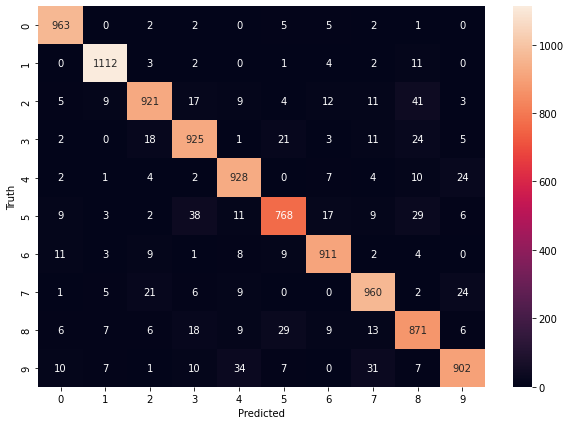

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
#using hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') #100 above is a random hit and trial value
])
tb_callback=tf.keras.callbacks.TensorBoard(log_dir='logs/',histogram_freq=1)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2869 - accuracy: 0.9175
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1322 - accuracy: 0.9616
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0927 - accuracy: 0.9713
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0700 - accuracy: 0.9786
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0544 - accuracy: 0.9833


In [21]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.9762


[0.07740972936153412, 0.9761999845504761]